In [1]:
import matplotlib.pyplot as plt
import numpy as np
import types # used to re-define acceleration / force

from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline

In [21]:
class WorldEvent:
    def __init__(self, time, position):
        self.time = time
        self.position = position

    def __repr__(self):
        return '({}, {})'.format(self.time, self.position)

In [22]:
class WorldLine:
    def __init__(self, events=[]):
        self.events = []
        [self.append(event) for event in events]

    def _sort(self):
        self.events = sorted(self.events, key=lambda e: e.time)
        
    def append(self, event):
        if isinstance(event, WorldEvent):
            self.events.append(event)
            self._sort()

    def get_index(self, event):
        try:
            return self.events.index(event)
        except:
            return None
        
    def get_prev(self, event):
        try:
            return self.events[self.get_index(event) - 1]
        except:
            return None
    
    def get_next(self, event):
        try:
            return self.events[self.get_index(event) + 1]
        except:
            return None

    def get_event(self, time):
        for e in reversed(self.events):
            if e.time <= time: break
        if e.time <= time:
            return e
        
    def position(self, time):
        e = self.get_event(time)
        n = self.get_next(e)
        if e and n:
            e_weight = 1 - ( time - e.time ) / ( n.time - e.time )
            n_weight = 1 - ( n.time - time ) / ( n.time - e.time )
            position = e.position * e_weight + n.position * n_weight
            return position

    def velocity(self, time):
        e = self.get_event(time)
        n = self.get_next(e)
        if e and n:
            velocity = ( n.position - e.position ) / ( n.time - e.time )
            return velocity

    def acceleration(self, time):
        e = self.get_event(time)
        n = self.get_next(e)
        p = self.get_prev(e)
        if e and n and p:
            v1 = ( n.position - e.position ) / ( n.time - e.time )
            v0 = ( e.position - p.position ) / ( e.time - p.time )
            dv = v1 - v0
            dt = 0.5 * ( n.time - p.time )    
            return dv / dt
        
    def r(self, time):
        return self.position(time)
    
    def v(self, time):
        return self.velocity(time)
    
    def a(self, time):
        return self.acceleration(time)

    @property
    def title(self):
        return ''
    
    def plot(self, toggle='rva', grid=True, legend_loc='lower left', arrows=False):
        rx, ry = zip(*[wl.r(e.time) for e in wl.events[1:-1]])
        if 'r' in toggle:
            plt.plot(rx, ry, 'b-', label='position')
            rx, ry = zip(*[wl.r(e.time) for e in wl.events[1:-1:4]])
            plt.plot(rx, ry, 'b.')
            rx, ry = zip(*[wl.r(e.time) for e in [wl.events[-2]]])
            plt.plot(rx, ry, 'bo', mec='b')
        
        rx, ry = zip(*[wl.r(e.time) for e in [wl.events[-2]]])

        vx, vy = zip(*[wl.v(e.time) for e in wl.events[1:-1]])
        if 'v' in toggle:
            plt.plot(vx, vy, 'g-', label='velocity')
            vx, vy = zip(*[wl.v(e.time) for e in wl.events[1:-1:4]])
            plt.plot(vx, vy, 'g.')
            vx, vy = zip(*[wl.v(e.time) for e in [wl.events[-2]]])
            plt.plot(vx, vy, 'go', mec='g')

        ax, ay = zip(*[wl.a(e.time) for e in wl.events[1:-1]])
        if 'a' in toggle:
            plt.plot(ax, ay, 'r-', label='acceleration')
            ax, ay = zip(*[wl.a(e.time) for e in wl.events[1:-1:4]])
            plt.plot(ax, ay, 'r.')
            ax, ay = zip(*[wl.a(e.time) for e in [wl.events[-2]]])
            plt.plot(ax, ay, 'ro', mec='r')
            
        if arrows:
            xmin, xmax = plt.xlim()
            ymin, ymax = plt.ylim()
            size = 0.5 * (xmax - xmin) + 0.5 * (ymax - ymin)
            head_size = {
                'head_width': 0.03 * size,
                'head_length': 0.05 * size,
            }
            if 'v' in toggle:
                plt.axes().arrow(rx[0], ry[0], vx[0], vy[0], fc='g', ec='g', **head_size)
            if 'a' in toggle:
                plt.axes().arrow(rx[0], ry[0], ax[0], ay[0], fc='r', ec='r', **head_size)

        plt.title(self.title)
        plt.legend(loc=legend_loc, numpoints=1)

        plt.axes().set_aspect('equal') # anything else will mess up angles
        plt.margins(0.05)
        if grid:
            plt.axes().axhline(0, c='k')
            plt.axes().axvline(0, c='k')
            plt.grid(True)


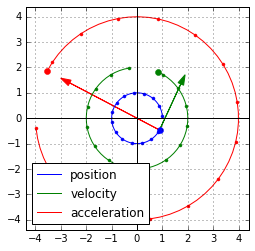

In [23]:
wl = WorldLine()
for q in range(60):
    t = q / 10
    x = 1.0 * np.cos(t)
    y = 1.0 * np.sin(t)
    wl.append(WorldEvent(t/2, np.array([x,y])))
wl.plot('rva', arrows=True)